# Lab 6

Author: Ryan Rosiak [rrosiak1@gulls.salisbury.edu] and Grant Dawson [gdawson1@gulls.salisbury.edu]

Date: 11/12/20

Description: Working with the iris dataset and the adult dataset and testing K-Nearest Neigbors on each

In [1]:
import matplotlib.pyplot as plt # Matplotlib library
import numpy.linalg as la # Linear algebra library
import numpy as np # Numby library
import pandas as pd # Pandas library
import math # Math library
import random # Random library
from tqdm import tqdm # For timing of certain functions
import time # Time macros

In [58]:
# KNN Class
class KNN:
    def __init__(self, k):
        self.k = k
        self.trainarr = []
        self.classifier_list = []
        self.predicted_points = []
        
    def distance(self, point):
        """
        Finds the distance of every training set value from point, and then returns the as list of tuples sorted in ascending order 
        by distance values paired with the corresponding "classifier"
        """
        distance_pairs_list = [(0,0) for _ in range(len(self.trainarr))]
        for ind,i in enumerate(self.trainarr):
            #distance_pairs_list.append((la.norm(np.array(point) - np.array(i[0])), i[1]))
            distance_pairs_list[ind] = (la.norm(np.array(point) - np.array(i[0])), i[1])
        distance_pairs_list.sort(key= lambda x: x[0])
        return distance_pairs_list
    
    def train(self, tlist):
        """
        Takes a list of training data => tuple containing a samples X ndims list and it's associated classifier 
        that will be stored for later
        """
        self.trainarr = tlist[:]
        self.classifier_list = list(set([i[1] for i in self.trainarr]))
        
    def predict(self, point, graphing=False):
        """ 
        Point must be a list, same dimension as the training set
        graphing is default False (for efficiency), otherwise True adds point to list for graphing later
        """
        classifier_counts = {i[1]: 0 for i in self.trainarr}
        distance_list = self.distance(point)
        key_select = ''
        for index,item in enumerate(distance_list):
            if index < self.k:
                classifier_counts[item[1]] += 1
            else:
                #max_dict_val = max([value for key,value in classifier_counts.items()])
                max_dict_val = max(classifier_counts.values())
                #max_dict_val = max(classifier_counts, key=classifier_counts.get)
                if list(classifier_counts.values()).count(max_dict_val) > 1:
                    classifier_counts[item[1]] += 1
                else:
                    for key, value in classifier_counts.items():
                        if value == max_dict_val:
                            key_select = key
                            break
                    break
        #print(f'I am predicting that the classifier for point {point} is... {key_select}!')
        if graphing:
            self.predicted_points.append((point, key_select))
        return key_select
        
    def plot_train(self):
        """
        Can only plot for 2d data
        """
        colors = ['Green', 'Red', 'Blue', 'Black', 'Yellow', 'Pink', 'Brown', 'Purple']
        for ind, item in enumerate(self.classifier_list):
            plotx = [j[0][0] for j in self.trainarr if j[1] == item]
            ploty = [j[0][1] for j in self.trainarr if j[1] == item]
            plt.scatter(x=plotx, y=ploty, c=colors[ind], label=item)
        plt.title('Plot of sample training data')
        plt.legend()
        plt.xlabel('X axis')
        plt.ylabel('Y axis')
        plt.show()
        
    def plot_train_and_predictions(self):
        """
        Can only plot for 2d data, plots the point that was predicted
        """
        colors = ['Green', 'Red', 'Blue', 'Black', 'Yellow', 'Pink', 'Brown', 'Purple']
        for ind, item in enumerate(self.classifier_list):
            plotxtrain = [j[0][0] for j in self.trainarr if j[1] == item]
            plotytrain = [j[0][1] for j in self.trainarr if j[1] == item]
            plotxpredict = [j[0][0] for j in self.predicted_points if j[1] == item]
            plotypredict = [j[0][1] for j in self.predicted_points if j[1] == item]
            plt.scatter(x=plotxtrain, y=plotytrain, c=colors[ind], label=f'Trained: {item}')
            plt.scatter(x=plotxpredict, y=plotypredict, c=colors[ind], label=f'Predicted: {item}', marker='^')
        plt.title(f'Plot of sample training data and predicted points (k = {self.k})')
        plt.legend()
        plt.xlabel('X axis')
        plt.ylabel('Y axis')
        plt.show()

In [59]:
# 1.  Begin by implementing the k-Nearest Neighbors (kNN) classification algorithm
# (a)  Use a Python class with internal parameter k and methods train and predict.
# i.  The train method should take in an array of pre-labeled data and store them to be used in the kN N calculation later.
# ii.  The predict method should take in a single data point (of the same dimension as those usedin training) and return the label of 
# the kNN decision.  
# Keep in mind that, in general, you may have to choose between multiple labels.  In this case, ties are possible, 
# but you can justdecide to break them randomly or increase k to get more votes.
iris_data = pd.read_csv('./iris.data',
                        header=None,
                        names=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Class']
                       )
                        
iris_data.head() # Print some of the data

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [60]:
adult_data = pd.read_csv('./adult.data',
                      header=None,
                      skipinitialspace=True,
                      names=['age', 'workclass', 'fnlwgt', 'education',
                             'education-num', 'marital-status', 
                             'occupation', 'relationship', 'race',
                             'sex', 'capital_gain', 'capital_loss',
                             'hr_per_week', 'country', 'income'
                            ]
                     )
adult_data.head() # Printing the first couple sets of data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


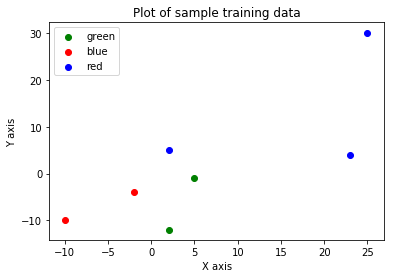

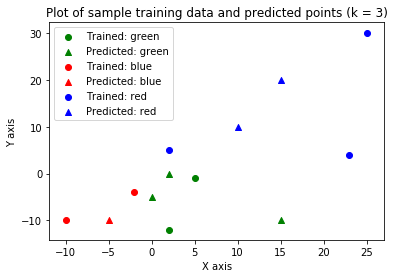

In [61]:
# (b)  Test the algorithm on some simple hand-made data that you can easily visualize or inspect to check for correct behavior.
knn1 = KNN(3)
train1 = [([23, 4], 'red'), ([5, -1], 'green'), ([-2, -4], 'blue'), ([2, 5], 'red'), ([25, 30], 'red'), 
          ([2, -12], 'green'), ([-10, -10], 'blue')]
knn1.train(train1)
knn1.plot_train()
knn1.predict([10, 10], True)
knn1.predict([2,0], True)
knn1.predict([15,20], True)
knn1.predict([0,-5], True)
knn1.predict([-5, -10], True)
knn1.predict([15, -10], True)
knn1.plot_train_and_predictions()

In [62]:
# 2.  Write a python routines to split a given data set (randomly) into testing and training subsets.  It’s a good idea to parameterize 
# this process with a percentage p so the data is split into sets of size np and n(1−p); 
# then you can “tune” p later for your specific training/testing procedure.
# split_sets Function
def split_sets_iris(dataframe, train_p):
    """
    Returns 2 lists of the form needed to use the KNN class using the iris data set
    """
    assert(train_p < 1) # Make sure that p is a percentage
    
    # Split dataframe into training and test/prediction sets
    train_count = int(dataframe.shape[0] * train_p)
    predict_count = int(dataframe.shape[0] * (1 - train_p))
    
    tmp_list = dataframe.values
    train_list = [(0,0) for _ in range(train_count)]
    for i in range(0, train_count):
        rand_row = tmp_list[random.randint(0, len(tmp_list) - 1)]
        #train_list.append(([rand_row[0], rand_row[1], rand_row[2], rand_row[3]], rand_row[4]))
        train_list[i] = ([rand_row[0], rand_row[1], rand_row[2], rand_row[3]], rand_row[4])

    
    predict_list = [(0,0) for _ in range(predict_count)]
    for i in range(0, predict_count):
        rand_row = tmp_list[random.randint(0, len(tmp_list) - 1)]
        #predict_list.append(([rand_row[0], rand_row[1], rand_row[2], rand_row[3]], rand_row[4]))
        predict_list[i] = ([rand_row[0], rand_row[1], rand_row[2], rand_row[3]], rand_row[4])
    '''
    print(train_list)
    print(predict_list)
    print(len(train_list), len(predict_list))
    '''
    
    return train_list, predict_list

In [63]:
# 3.  Using the iris dataset, test your kNN algorithm to predict which class a given iris belongs to.
# (a)  Show some confusion matrices for different size testing versus training datasets.
# TESTING FOR CHANGE IN P
print('Testing for change in p:')
# Test 1 p = .1, k = 5
tlist, plist = split_sets_iris(iris_data, .1)
# Set the confusion matrix
confusion_matrix = {"Correct": 0, "Incorrect": 0}
# Create the class k = 5
knn2 = KNN(5)
# Train the data
knn2.train(tlist)
# Predict and populate the confusion matrix
for i in plist:
    check = knn2.predict(i[0])
    if check == i[1]:
        confusion_matrix["Correct"] += 1
    else:
        confusion_matrix["Incorrect"] += 1
print(f'Test 1: For KNN, k = 5, p = .1, the confusion matrix for the iris data set is {confusion_matrix}')
# Test 2 p = .35, k = 5
tlist, plist = split_sets_iris(iris_data, .35)
# Set the confusion matrix
confusion_matrix = {"Correct": 0, "Incorrect": 0}
# Create the class k = 5
knn3 = KNN(5)
# Train the data
knn3.train(tlist)
# Predict and populate the confusion matrix
for i in plist:
    check = knn3.predict(i[0])
    if check == i[1]:
        confusion_matrix["Correct"] += 1
    else:
        confusion_matrix["Incorrect"] += 1
print(f'Test 2: For KNN, k = 5, p = .35, the confusion matrix for the iris data set is {confusion_matrix}')
# Test 3 p = .5, k = 5
tlist, plist = split_sets_iris(iris_data, .5)
# Reset the confusion matrix
confusion_matrix["Correct"] = confusion_matrix["Incorrect"] = 0
# Create the class k = 5
knn4 = KNN(5)
# Train the data
knn4.train(tlist)
# Predict and populate the confusion matrix
for i in plist:
    check = knn4.predict(i[0])
    if check == i[1]:
        confusion_matrix["Correct"] += 1
    else:
        confusion_matrix["Incorrect"] += 1
print(f'Test 3: For KNN, k = 5, p = .5, the confusion matrix for the iris data set is {confusion_matrix}')
# Test 4 p = .75, k = 5
tlist, plist = split_sets_iris(iris_data, .75)
# Set the confusion matrix
confusion_matrix = {"Correct": 0, "Incorrect": 0}
# Create the class k = 5
knn5 = KNN(5)
# Train the data
knn5.train(tlist)
# Predict and populate the confusion matrix
for i in plist:
    check = knn5.predict(i[0])
    if check == i[1]:
        confusion_matrix["Correct"] += 1
    else:
        confusion_matrix["Incorrect"] += 1
print(f'Test 4: For KNN, k = 5, p = .75, the confusion matrix for the iris data set is {confusion_matrix}')
# Test 5 p = .95, k = 5
tlist, plist = split_sets_iris(iris_data, .95)
# Reset the confusion matrix
confusion_matrix["Correct"] = confusion_matrix["Incorrect"] = 0
# Create the class k = 5
knn6 = KNN(5)
# Train the data
knn6.train(tlist)
# Predict and populate the confusion matrix
for i in plist:
    check = knn6.predict(i[0])
    if check == i[1]:
        confusion_matrix["Correct"] += 1
    else:
        confusion_matrix["Incorrect"] += 1
print(f'Test 5: For KNN, k = 5, p = .95, the confusion matrix for the iris data set is {confusion_matrix}')
# TESTING FOR CHANGE IN K
print('Testing for change in k:')
# Test 6 p = .75, k = 3
tlist, plist = split_sets_iris(iris_data, .75)
# Reset the confusion matrix
confusion_matrix["Correct"] = confusion_matrix["Incorrect"] = 0
# Create the class k = 3
knn7 = KNN(3)
# Train the data
knn7.train(tlist)
# Predict and populate the confusion matrix
for i in plist:
    check = knn7.predict(i[0])
    if check == i[1]:
        confusion_matrix["Correct"] += 1
    else:
        confusion_matrix["Incorrect"] += 1
print(f'Test 6: For KNN, k = 3, p = .75, the confusion matrix for the iris data set is {confusion_matrix}')
# Test 7 p = .75, k = 5
tlist, plist = split_sets_iris(iris_data, .75)
# Reset the confusion matrix
confusion_matrix["Correct"] = confusion_matrix["Incorrect"] = 0
# Create the class k = 5
knn8 = KNN(5)
# Train the data
knn8.train(tlist)
# Predict and populate the confusion matrix
for i in plist:
    check = knn8.predict(i[0])
    if check == i[1]:
        confusion_matrix["Correct"] += 1
    else:
        confusion_matrix["Incorrect"] += 1
print(f'Test 7: For KNN, k = 5, p = .75, the confusion matrix for the iris data set is {confusion_matrix}')
# Test 8 p = .75, k = 11
tlist, plist = split_sets_iris(iris_data, .75)
# Reset the confusion matrix
confusion_matrix["Correct"] = confusion_matrix["Incorrect"] = 0
# Create the class k = 11
knn9 = KNN(11)
# Train the data
knn9.train(tlist)
# Predict and populate the confusion matrix
for i in plist:
    check = knn9.predict(i[0])
    if check == i[1]:
        confusion_matrix["Correct"] += 1
    else:
        confusion_matrix["Incorrect"] += 1
print(f'Test 8: For KNN, k = 11, p = .75, the confusion matrix for the iris data set is {confusion_matrix}')

Testing for change in p:
Test 1: For KNN, k = 5, p = .1, the confusion matrix for the iris data set is {'Correct': 111, 'Incorrect': 24}
Test 2: For KNN, k = 5, p = .35, the confusion matrix for the iris data set is {'Correct': 95, 'Incorrect': 2}
Test 3: For KNN, k = 5, p = .5, the confusion matrix for the iris data set is {'Correct': 73, 'Incorrect': 2}
Test 4: For KNN, k = 5, p = .75, the confusion matrix for the iris data set is {'Correct': 33, 'Incorrect': 4}
Test 5: For KNN, k = 5, p = .95, the confusion matrix for the iris data set is {'Correct': 7, 'Incorrect': 0}
Testing for change in k:
Test 6: For KNN, k = 3, p = .75, the confusion matrix for the iris data set is {'Correct': 35, 'Incorrect': 2}
Test 7: For KNN, k = 5, p = .75, the confusion matrix for the iris data set is {'Correct': 33, 'Incorrect': 4}
Test 8: For KNN, k = 11, p = .75, the confusion matrix for the iris data set is {'Correct': 34, 'Incorrect': 3}


## (b)  How does the accuracy change for different size training sets?  Show how the accuracy changes within the training set and testing set separately.

Because this is a machine learning algorithm, the amount of correct and incorrect labels vary from run to run. Nevertheless, when looking at 
p, as we increase the size of the training set the better results we get. We generally get more correct because there are more points for our algorithm to go off of. (i.e. There is more of a chance that we are going to get a correct reading because KNN needs to look at points that are "close" to our predicted value.) If there are more points, then we are more likely to get the "correct" points around the predicted point in order for the algorithm to label the point correctly. The testing set works in a similar way. When you vary the size of the testing set (which varies along with the training set) we see different amounts of error. When we have a very high training set like .95, although we do have a 
lot of points to go off of, we have very little points that we are actually predicting and for each subsequent error the percentage of incorrect changes drastically. This can be a consequence of overtraining. The other extreme is undertraining where we get something like p p = .1. This give us not enough to go off of and can make our error very large but because we are predicting so many points, the actual percentage wrong could be rather low. There must be a fine line between the two sets. Overall, there will always be variance in the amount that are correct and incorrect for any tesing and training set given. But, finding the line between over and undertraining can make the difference in the long run. (Aside: one thing that we cant control in the prediction set is the points that are randomly chosen. We can get "lucky" in a sense with what points are chosen because some points are a lot more "obvious" the the algorithm than others based off the training data. If we have points that run into more collisions and make the algorithm work harder, we are more likely to see an extra overhead of error)

## (c)  What if you repeat this process,  keeping the training fraction p the same?  Does the accuracy change drastically based on the “quality” of the testing set? How might you quantify this behavior?

If you repeat the process over and over again (i.e. repeatedly running the cell of tests up above) the results for every test when looking at the same p will vary every time. This is because the "quality" of the training set changes on every run due to the subsets being chosen at random. In some cases, if there are a  lot of training points close together and we get a point that is placed within a cluster, than there is a good chance that there will be confusion. Especially, when we go into higher dimensions and there are more ways for data to be clustered. Overall, the closer our data points sit to each other (i.e. the less variation there is from label to label there is) the more likely we are to have lower quality training sets which is highly dependent on the data that we are trying to predict to begin with. I believe that for a general case, the error of labeling based off of the specific training set is generally within some epsilon but there can always be extreme cases. The real thought is how to quantify this behavior. The way that we could quantify this behaviour would be to look at to main things that we could get some sort of probability out of. This would be consistency and accuracy. We can judge the quality of the training set by the amount that it gets right in general and how often it gets a certain threshold correct. These can be done with probabilities. For example, we could find the probability that the algorithm will get less than a certain amount wrong (or within a percentage wrong) to test for accuracy and then run multiple tests on specific inputs to find out how consistent it is at hitting that specific accuracy probability. This would be the best way to quantify if our training set is doing its job or not.

## 4.  Try using the adult dataset to also do some prediction of income level (more or less than $50k).
### (a)  How  can  you  try  to  quantify  the  “distance”  between  two  adults?   Write  some  small  python functions to try and transform this data into something that can be used by the kNN classifier. Try a couple different approaches,  report their different behaviors and illustrate using learning curves, confusion matrices, and possibly some statistical measurements.

Some ways that we can try to quantify distance between two adults is looking at key numerical data that is contained within the adult dataset. Some of these key numerical data points are hr_per_week, age, and education-num. When thinking of income in particular, these are normally the determining factors when it comes to how much money you will make at any given point in someones life. So, we can look at age to determine how long someone has been working as a sort of "distance". We can look at hr_per_week as a way to differentiate between who works more and less as a sort of "distance". Lastly, we can look at education-num as a sort of "distance" because people with higher education tend to make more money. All of these values can be used as our 3 dimensional axes without any tuning because their values can just be directly interpreted within the context of the KNN classifier.

## Approach 1: Classifying income by looking at age, education-num, and hr_per_week

In [64]:
# split_sets_adult_1 Function
def split_sets_adult(dataframe, train_p):
    """
    Returns 2 lists of the form needed to use the KNN class using the iris data set
    """
    assert(train_p < 1) # Make sure that p is a percentage
    
    # Split dataframe into training and test/prediction sets
    train_count = int(dataframe.shape[0] * train_p)
    predict_count = int(dataframe.shape[0] * (1 - train_p))
    
    #tmp_list = dataframe.values
    
    tmp_list = dataframe.values[:]
    np.random.shuffle(tmp_list)
    train_list = tmp_list[0:train_count]
    predict_list = tmp_list[train_count+1:]
    
    #train_list = [ dataframe.values[random.randint(0,train_count-1)][0:4] for i in range(0, train_count) ]
    #predict_list = [ dataframe.values[random.randint(0,train_count-1)][0:4] for i in range(0, predict_count) ]
    
    train_list = [(0,0) for _ in range(train_count)]
    for i in range(0, train_count):
        rand_row = tmp_list[random.randint(0, len(tmp_list) - 1)]
        #train_list.append(([rand_row[0], rand_row[1], rand_row[2]], rand_row[3]))
        train_list[i] = ([rand_row[0], rand_row[1], rand_row[2]], rand_row[3])


    predict_list = [(0,0) for _ in range(predict_count)]
    for i in range(0, predict_count):
        rand_row = tmp_list[random.randint(0, len(tmp_list) - 1)]
        #predict_list.append(([rand_row[0], rand_row[1], rand_row[2]], rand_row[3]))
        predict_list[i] = ([rand_row[0], rand_row[1], rand_row[2]], rand_row[3])

    #print(train_list)
    #print(predict_list)
    #print(len(train_list), len(predict_list))
    
    
    return train_list, predict_list

In [65]:
sub_data_1 = adult_data[['age', 'education-num', 'hr_per_week', 'income']]
%prun split_sets_adult(sub_data_1, 0.1)

         178 function calls (174 primitive calls) in 0.071 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.066    0.066    0.066    0.066 {method 'shuffle' of 'mtrand.RandomState' objects}
        2    0.002    0.001    0.002    0.001 {method 'astype' of 'numpy.ndarray' objects}
        1    0.001    0.001    0.005    0.005 internals.py:3953(_interleave)
        1    0.001    0.001    0.001    0.001 {built-in method numpy.core.multiarray.empty}
        1    0.000    0.000    0.071    0.071 <string>:1(<module>)
        1    0.000    0.000    0.071    0.071 {built-in method builtins.exec}
        2    0.000    0.000    0.000    0.000 numerictypes.py:942(_can_coerce_all)
        1    0.000    0.000    0.070    0.070 <ipython-input-64-4d809221d8d1>:2(split_sets_adult)
        1    0.000    0.000    0.000    0.000 cast.py:1093(find_common_type)
        1    0.000    0.000    0.000    0.000 {method 'reduce' of 'num

In [ ]:
# Test 1
sub_data_1 = adult_data[['age', 'education-num', 'hr_per_week', 'income']]

# Set the training percentage values and the corresponding incorrect percentages
train_percentage = [.01, .05, .1, .2, .3, .4, .5, .6]
incorrect_percentage = [0, 0, 0, 0, 0, 0, 0, 0]
# Run the algorithm for each value of p

for index,tp in enumerate(train_percentage):
    tlist, plist = split_sets_adult(sub_data_1, tp)

    adult_knn = KNN(5)
    adult_knn.train(tlist)
    conf_mat = {"Correct": 0, "Incorrect": 0}
    for ind,i in enumerate(plist):
        #if ind > 2000:
            #break
        check = adult_knn.predict(i[0])
        if check == i[1]:
            conf_mat["Correct"] += 1
        else:
            conf_mat["Incorrect"] += 1
    print(f'Test {index + 1}: Adult data based off of age, education-num, and hr_per_week: The confusion matrix is {conf_mat}')
    incorrect_percentage[index] = conf_mat["Incorrect"] / (conf_mat["Correct"] + conf_mat["Incorrect"])

plt.plot(train_percentage, incorrect_percentage, color='green')
plt.title('Predicting Income Learning Curve: Error % as Training Increases (k = 5)')
plt.xlabel('Training Percentage p')
plt.ylabel('Percentage Incorrect')
plt.show()

Test 1: Adult data based off of age, education-num, and hr_per_week: The confusion matrix is {'Correct': 9263, 'Incorrect': 22972}
Test 2: Adult data based off of age, education-num, and hr_per_week: The confusion matrix is {'Correct': 8118, 'Incorrect': 22814}
Test 3: Adult data based off of age, education-num, and hr_per_week: The confusion matrix is {'Correct': 8261, 'Incorrect': 21043}


## Approach 2: Classifying income by looking at age, sex, and capital_gain

In [16]:
# fix_sex Function => Creates unique values for each sex in the dataframe and returns the new dataframe
def fix_sex(dataframe):
    #dataframe['sex'] = dataframe['sex'].replace(['Male', 'Female'], [0, 1])
    dataframe.loc[(dataframe.sex == 'Male'), 'sex'] = 0
    dataframe.loc[(dataframe.sex == 'Female'), 'sex'] = 1
    return dataframe

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Test 1: Adult data based off of age, sex, and capital_gain: The confusion matrix is {'Correct': 1510, 'Incorrect': 491}
Test 2: Adult data based off of age, sex, and capital_gain: The confusion matrix is {'Correct': 1597, 'Incorrect': 404}
Test 3: Adult data based off of age, sex, and capital_gain: The confusion matrix is {'Correct': 1550, 'Incorrect': 451}
Test 4: Adult data based off of age, sex, and capital_gain: The confusion matrix is {'Correct': 1556, 'Incorrect': 445}
Test 5: Adult data based off of age, sex, and capital_gain: The confusion matrix is {'Correct': 1598, 'Incorrect': 403}
Test 6: Adult data based off of age, sex, and capital_gain: The confusion matrix is {'Correct': 1550, 'Incorrect': 451}
Test 7: Adult data based off of age, sex, and capital_gain: The confusion matrix is {'Correct': 1576, 'Incorrect': 425}
Test 8: Adult data based off of age, sex, and capital_gain: The confusion matrix is {'Correct': 1567, 'Incorrect': 434}


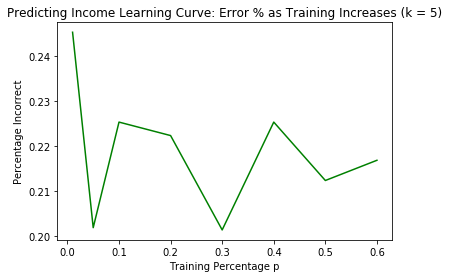

In [17]:
# Test 2
sub_data_2 = adult_data[['age', 'sex', 'capital_gain', 'income']]
sub_data_2 = fix_sex(sub_data_2)

# Set the training percentage values and the corresponding incorrect percentages
train_percentage = [.01, .05, .1, .2, .3, .4, .5, .6]
incorrect_percentage = [0, 0, 0, 0, 0, 0, 0, 0]
# Run the algorithm for each value of p
for index,tp in enumerate(train_percentage):
    
    tlist, plist = split_sets_adult(sub_data_2, tp)

    adult_knn = KNN(5)
    adult_knn.train(tlist)
    conf_mat = {"Correct": 0, "Incorrect": 0}
    for ind,i in enumerate(plist):
        if ind > 2000:
            break
        check = adult_knn.predict(i[0])
        if check == i[1]:
            conf_mat["Correct"] += 1
        else:
            conf_mat["Incorrect"] += 1
    print(f'Test {index + 1}: Adult data based off of age, sex, and capital_gain: The confusion matrix is {conf_mat}')
    incorrect_percentage[index] = conf_mat["Incorrect"] / (conf_mat["Correct"] + conf_mat["Incorrect"])

plt.plot(train_percentage, incorrect_percentage, color='green')
plt.title('Predicting Income Learning Curve: Error % as Training Increases (k = 5)')
plt.xlabel('Training Percentage p')
plt.ylabel('Percentage Incorrect')
plt.show()

## (b)  Are there other “labels” within the dataset that can be effectively learned by the kNN classifier?

Some other labels that can be effectively learned by the kNN classifier are sex and occupation. First, you can test for sex by looking at the amount of income they make by assigning 0 to <=50K and 1 to >50K, and the specific occupation each sample is in following a similar unique numbering process. You can use these numbers to determine the "distance" between each person and then guess what sex you actually think that the person is. This is a viable option for determining sex because there are wage gaps from gender to gender as well as gaps in what gender tends to do what type of job. This makes these attributes for determining distance very clear and concise. Second, you can test for occupation by looking at the gender of each sample and assigning each a unique number like 0 and 1, looking at income using a similar numbering system, and looking at workclass using a similar numbering system. You can use these numbers to determing the "distance" between each person because a person's occupation is normally influenced by what gender they are, how much income they make, and what work class they are under. There can be mini correlations between the determining variables like certain high paying jobs are more likely to be within a certain workclass and certain genders will also tend to be in a certain workclass. This makes each determining variable clearly the right choice in determining what occupation is being classified.